In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the .csv file as a dataframe (df)
heart=pd.read_csv('../heart.csv')

In [3]:
#outputing first 10 lines of df
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#number of lines in df
len(heart)

918

In [5]:
#the NUMBER of unique values in 'HeartDisease' column
#heart['HeartDisease'].unique() returns a VECTOR of unique values in 'HeartDisease' column
len(heart['HeartDisease'].unique())

2

In [6]:
#table describing the main characteristics of the df
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cholesterol')

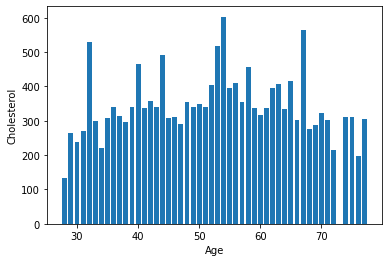

In [8]:
#building a bar chart of the dependence of cholesterol levels on age
plt.bar(heart['Age'], heart['Cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
#the diagram does not show any particular dependence, 
#and outliers are evenly distributed across the entire age scale

In [9]:
#calculating the average age with an accuracy of 1 decimal place
round(heart['Age'].mean(), 1)

53.5

In [10]:
#calculating the median of ages
heart['Age'].median()

54.0

In [11]:
#calculating the mode of ages
heart['Age'].mode()

0    54
dtype: int64

In [12]:
#getting a sorted list of ages
heart['Age'].sort_values()

208    28
219    29
170    29
829    29
215    30
       ..
491    75
541    76
688    76
814    77
447    77
Name: Age, Length: 918, dtype: int64

In [13]:
#frequency table for 'RestingECG' results
pd.crosstab(heart['RestingECG'], columns='Number')

col_0,Number
RestingECG,
LVH,188
Normal,552
ST,178


In [14]:
#calculating quantiles, IQR, upper and lower bounds for non-outliers for cholesterol values
Q1=heart['Cholesterol'].quantile(0.25)
Q3=heart['Cholesterol'].quantile(0.75)
IQR=Q3-Q1
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

{'whiskers': [<matplotlib.lines.Line2D at 0x7f06c4d9ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f06c4daf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06c4e127f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f06c4dafaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f06c4dafe80>],
 'means': []}

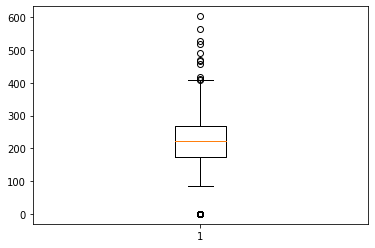

In [15]:
#building a boxplot for cholesterol values
plt.boxplot(heart['Cholesterol'])
#the plot shows that there are many outliers with a large amount of cholesterol 
#and 50% of respondents have results in the range from 180 to 280
#the minimum value is 0
#the maximum value is approximately 600

In [16]:
#building a new dataframe from the columns of age and experience of angina
df=pd.DataFrame(heart['ExerciseAngina'], heart['Age'])